In [1]:
# 이미지 파일 확인
import os

# image 파일 주소
base_path = './PCB_DATASET/images'
# 폴더명
folders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']

for folder in folders:
    # 주소 + 폴더명
    folder_path = os.path.join(base_path, folder)
    # os.listdir : 지정된 디렉토리 내의 파일 및 서브디렉토리 목록을 가져오는 데 사용
    # endswith :  Python의 문자열 메소드로, 문자열이 특정 접미사로 끝나는지 여부를 확인하는 데 사용
    jpg_count = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
    print(f"{folder}: {jpg_count} JPG files")

Spurious_copper: 116 JPG files
Mouse_bite: 115 JPG files
Open_circuit: 116 JPG files
Missing_hole: 115 JPG files
Spur: 115 JPG files
Short: 116 JPG files


In [4]:
# xml 파일 확인
import os
# xml 파일 주소
xml_folder_path = "./PCB_DATASET/Annotations/"

# xml 파일 넣을 변수 생성
xml_files = []
for folder in ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']:
    # 주소 + 폴더명
    folder_path = os.path.join(xml_folder_path, folder)

    if os.path.isdir(folder_path):
        xml_files.extend([os.path.join(folder, f) for f in os.listdir(folder_path) if f.endswith('.xml')])

print(xml_files[0])

num_files = len(xml_files)
print(f"{num_files} XML")

for folder in ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']:
    folder_path = os.path.join(xml_folder_path, folder)
    num_files_in_folder = len([f for f in os.listdir(folder_path) if f.endswith('.xml')])
    print(f"{folder} {num_files_in_folder} XML")

Spurious_copper\01_spurious_copper_01.xml
693 XML
Spurious_copper 116 XML
Mouse_bite 115 XML
Open_circuit 116 XML
Missing_hole 115 XML
Spur 115 XML
Short 116 XML


In [7]:
!pip install Pillow

from PIL import Image
import os

In [8]:
original_folder = './PCB_DATASET/images'
resized_folder = './PCB_DATASET/PCB_resized'
os.makedirs(resized_folder, exist_ok=True)
folders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']

In [ ]:
# image size 3034 X 1586
# Yolov5는 기본적으로 640 X 640 크기의 이미지는 사용하여 학습한다

In [18]:
# 목록 불러오기
for folder in folders:
    folder_path = os.path.join(original_folder, folder)
    images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    os.makedirs(resized_folder, exist_ok=True)
    for image in images:
        image_path = os.path.join(folder_path, image)
        img = Image.open(image_path)
        # 640 X 640 size 변경
        resized_img = img.resize((640, 640))
        output_path = os.path.join(resized_folder, image)
        resized_img.save(output_path)
        print(f"img: {image}, path: {output_path}")
print("end")

img: 01_spurious_copper_01.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_01.jpg
img: 01_spurious_copper_02.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_02.jpg
img: 01_spurious_copper_03.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_03.jpg
img: 01_spurious_copper_04.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_04.jpg
img: 01_spurious_copper_05.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_05.jpg
img: 01_spurious_copper_06.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_06.jpg
img: 01_spurious_copper_07.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_07.jpg
img: 01_spurious_copper_08.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_08.jpg
img: 01_spurious_copper_09.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_09.jpg
img: 01_spurious_copper_10.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_10.jpg
img: 01_spurious_copper_11.jpg, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_11.jpg
img: 01_sp

In [19]:
import os
# Python의 xml.etree.ElementTree는 XML 데이터를 처리하는 데 유용한 기본 라이브러리
import xml.etree.ElementTree as ET

def resize_xml(xml_path, output_path, target_size):
    # xml 파일 읽기
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for size in root.iter('size'):
        width = int(size.find('width').text)
        height = int(size.find('height').text)

        size.find('width').text = str(target_size)
        size.find('height').text = str(target_size)

    for obj in root.iter('object'):
        for box in obj.iter('bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)

            xmin = int(xmin * target_size / width)
            ymin = int(ymin * target_size / height)
            xmax = int(xmax * target_size / width)
            ymax = int(ymax * target_size / height)

            box.find('xmin').text = str(xmin)
            box.find('ymin').text = str(ymin)
            box.find('xmax').text = str(xmax)
            box.find('ymax').text = str(ymax)

    tree.write(output_path)

original_annotations_folder = './PCB_DATASET/Annotations'
resized_annotations_folder = './PCB_DATASET/PCB_resized'
os.makedirs(resized_annotations_folder, exist_ok=True)

target_size = 640
for folder in folders:
    folder_path = os.path.join(original_annotations_folder, folder)

    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]
    for xml_file in xml_files:
        xml_path = os.path.join(folder_path, xml_file)

        base_filename = os.path.splitext(xml_file)[0]
        output_xml_path = os.path.join(resized_annotations_folder, f"{base_filename}.xml")
        resize_xml(xml_path, output_xml_path, target_size)

        print(f"xml: {xml_file}, path: {output_xml_path}")

print("end")

xml: 01_spurious_copper_01.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_01.xml
xml: 01_spurious_copper_02.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_02.xml
xml: 01_spurious_copper_03.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_03.xml
xml: 01_spurious_copper_04.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_04.xml
xml: 01_spurious_copper_05.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_05.xml
xml: 01_spurious_copper_06.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_06.xml
xml: 01_spurious_copper_07.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_07.xml
xml: 01_spurious_copper_08.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_08.xml
xml: 01_spurious_copper_09.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_09.xml
xml: 01_spurious_copper_10.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_10.xml
xml: 01_spurious_copper_11.xml, path: ./PCB_DATASET/PCB_resized\01_spurious_copper_11.xml
xml: 01_sp

In [20]:
import os
import random
from shutil import copyfile

# 주소
source_folder = './PCB_DATASET/PCB_resized'
output_folder = './PCB_DATASET/PCB_split'
# 폴더 생성
os.makedirs(output_folder, exist_ok=True)

# 훈련 데이터 : 80%, 테스트 데이터 : 20%
train_ratio = 0.8
val_ratio = 0.2

# 폴더 생성
for subset in ['train', 'val']:
    os.makedirs(os.path.join(output_folder, subset), exist_ok=True)

for xml_file in os.listdir(source_folder):
    # xml 파일만 읽기
    if xml_file.endswith('.xml'):
        base_filename = os.path.splitext(xml_file)[0]

        # 0과 1사이의 소수점 숫자 반환
        rand_num = random.random()
        if rand_num < train_ratio:
            subset_folder = 'train'
        else:
            subset_folder = 'val'

        # .xml 파일 복사
        src_xml = os.path.join(source_folder, xml_file)
        dest_xml = os.path.join(output_folder, subset_folder, f'{base_filename}.xml')
        copyfile(src_xml, dest_xml)

        # .jpg 파일 복사
        jpg_file = f'{base_filename}.jpg'
        src_jpg = os.path.join(source_folder, jpg_file)
        dest_jpg = os.path.join(output_folder, subset_folder, jpg_file)
        copyfile(src_jpg, dest_jpg)

In [21]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

def convert_xml_to_yolo(xml_path, image_width, image_height, class_mapping):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    labels = []
    # object 속성 다 찾기
    for obj in root.findall('object'):
        # <name>missing_hole</name>
        class_name = obj.find('name').text
        if class_name not in class_mapping:
            continue

        class_id = class_mapping[class_name]
        # bndbox 속성 찾기 
        bbox = obj.find('bndbox')

        x_center = (float(bbox.find('xmin').text) + float(bbox.find('xmax').text)) / 2.0 / image_width
        y_center = (float(bbox.find('ymin').text) + float(bbox.find('ymax').text)) / 2.0 / image_height
        width = (float(bbox.find('xmax').text) - float(bbox.find('xmin').text)) / image_width
        height = (float(bbox.find('ymax').text) - float(bbox.find('ymin').text)) / image_height

        labels.append(f"{class_id} {x_center} {y_center} {width} {height}")

    # list return
    return labels

# txt 파일 생성
def create_yolo_labels(source_folder, output_folder, class_mapping):
    for xml_file in os.listdir(source_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(source_folder, xml_file)

            image_file = os.path.splitext(xml_file)[0] + '.jpg'
            image_path = os.path.join(source_folder.replace('Annotations', 'JPEGImages'), image_file)
            img = Image.open(image_path)
            image_width, image_height = img.size

            labels = convert_xml_to_yolo(xml_path, image_width, image_height, class_mapping)

            output_path = os.path.join(output_folder, os.path.splitext(xml_file)[0] + '.txt')
            with open(output_path, 'w') as f:
                f.write('\n'.join(labels))

# 결함 이름
class_mapping = {'spurious_copper': 0, 'mouse_bite': 1, 'open_circuit': 2, 'missing_hole': 3, 'spur': 4, 'short': 5}

create_yolo_labels('./PCB_DATASET/PCB_split/train', './PCB_DATASET/PCB_split/train', class_mapping)
create_yolo_labels('./PCB_DATASET/PCB_split/val', './PCB_DATASET/PCB_split/val', class_mapping)

Randomly selected image: 01_spurious_copper_19.jpg


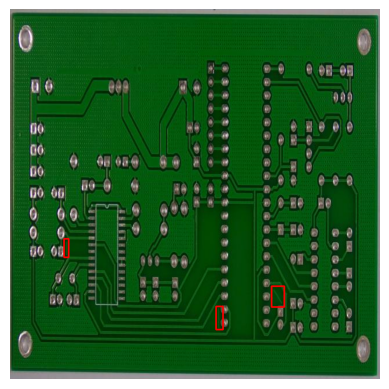

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def visualize_random_image_with_labels(images_folder, labels_folder):
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

    # 랜덤으로 선택
    random_image_file = random.choice(image_files)
    print("Randomly selected image:", random_image_file)

    image_path = os.path.join(images_folder, random_image_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    label_file = os.path.splitext(random_image_file)[0] + '.txt'
    label_path = os.path.join(labels_folder, label_file)

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            # class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            img_height, img_width, _ = image.shape
            x, y, w, h = map(int, [x_center * img_width, y_center * img_height, width * img_width, height * img_height])
            x1, y1, x2, y2 = x - w//2, y - h//2, x + w//2, y + h//2
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

train_folder = './PCB_DATASET/PCB_split/train'
labels_folder = './PCB_DATASET/PCB_split/train'

visualize_random_image_with_labels(train_folder, labels_folder)

## test dataset

In [1]:
import os
import shutil

source_folder = './PCB_DATASET/rotation'
target_folder = './rotation_test'

os.makedirs(target_folder, exist_ok=True)

subfolders = ['Spurious_copper_rotation', 'Mouse_bite_rotation', 'Open_circuit_rotation', 'Missing_hole_rotation', 'Spur_rotation', 'Short_rotation']
for subfolder in subfolders:
    subfolder_path = os.path.join(source_folder, subfolder)

    for filename in os.listdir(subfolder_path):
        if filename.endswith('.jpg'):
            source_filepath = os.path.join(subfolder_path, filename)
            target_filepath = os.path.join(target_folder, filename)
            shutil.copy2(source_filepath, target_filepath)


In [2]:
from PIL import Image
import os

source_folder = './rotation_test'
target_folder = './rotation_test_resized'

os.makedirs(target_folder, exist_ok=True)

for filename in os.listdir(source_folder):
    if filename.endswith('.jpg'):
        source_filepath = os.path.join(source_folder, filename)
        img = Image.open(source_filepath)
        img_resized = img.resize((640, 640))

        target_filepath = os.path.join(target_folder, filename)
        img_resized.save(target_filepath)


## Random visual inspection from test dataset

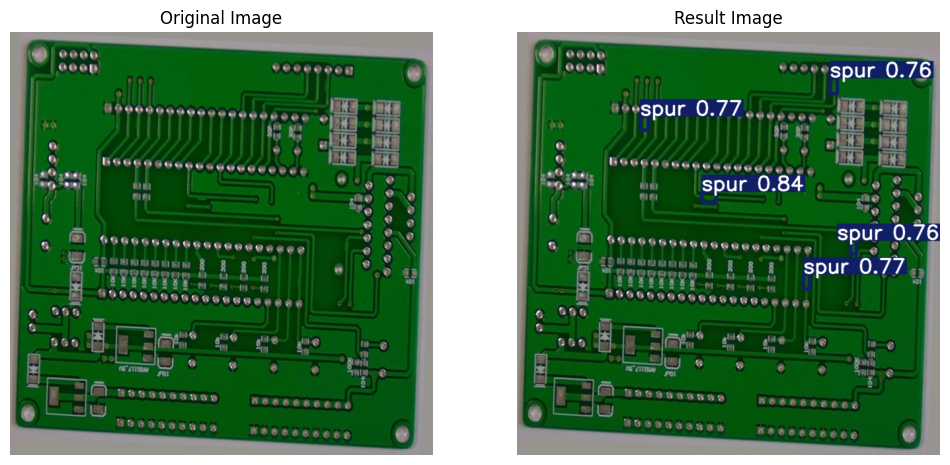

file_name: 09_spur_03.jpg
class_id: 4, position: [0.75, 0.13, 0.02, 0.04], softmax: 0.76
class_id: 4, position: [0.79, 0.51, 0.01, 0.03], softmax: 0.76
class_id: 4, position: [0.30, 0.21, 0.02, 0.03], softmax: 0.77
class_id: 4, position: [0.68, 0.59, 0.02, 0.04], softmax: 0.77
class_id: 4, position: [0.45, 0.39, 0.03, 0.03], softmax: 0.84


In [16]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

original_folder = './rotation_test_resized'
result_folder = './yolov5/runs/detect/exp'

original_files = [f for f in os.listdir(original_folder) if f.endswith('.jpg')]

selected_file = random.choice(original_files)
selected_original_filepath = os.path.join(original_folder, selected_file)

original_img = Image.open(selected_original_filepath)
result_file = os.path.join(result_folder, selected_file)
result_img = Image.open(result_file)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_img)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(result_img)
axes[1].set_title('Result Image')
axes[1].axis('off')
plt.show()
print("file_name:", selected_file)

label_filepath = os.path.join(result_folder, 'labels', os.path.splitext(selected_file)[0] + '.txt')
if os.path.exists(label_filepath):
    with open(label_filepath, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height, softmax = map(float, line.split()[0:])
            print(f"class_id: {int(class_id)}, position: [{x_center:.2f}, {y_center:.2f}, {width:.2f}, {height:.2f}], softmax: {softmax:.2f}")
else:
    print(f"error {label_filepath}")